# Preparing the Data to Train Bounding Box

## Initial Setup

Auto update from code base

In [1]:
%load_ext autoreload
%autoreload 2

Import libraries

In [399]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import os
import skimage
from PIL import Image
from PIL.ImageDraw import Draw
from torchvision import transforms

from src.data import pil_loader
from src.image_preprocessing import draw_dots, draw_rectangle

## Sample data to be used for training and validating bounding box model

In [3]:
df_beauty_train = pd.read_csv('data/raw/beauty_data_info_train_competition.csv')
df_beauty_val = pd.read_csv('data/raw/beauty_data_info_val_competition.csv')

df_fashion_train = pd.read_csv('data/raw/fashion_data_info_train_competition.csv')
df_fashion_val = pd.read_csv('data/raw/fashion_data_info_val_competition.csv')

df_mobile_train = pd.read_csv('data/raw/mobile_data_info_train_competition.csv')
df_mobile_val = pd.read_csv('data/raw/mobile_data_info_val_competition.csv')

In [4]:
df_beauty_train_sample = df_beauty_train.sample(n=80, random_state=2019)
df_beauty_val_sample = df_beauty_val.sample(n=20, random_state=2019)

df_fashion_train_sample = df_fashion_train.sample(n=80, random_state=2019)
df_fashion_val_sample = df_fashion_val.sample(n=20, random_state=2019)

df_mobile_train_sample = df_mobile_train.sample(n=80, random_state=2019)
df_mobile_val_sample = df_mobile_val.sample(n=20, random_state=2019)

In [5]:
df_beauty_bb_train = pd.DataFrame({'image_path': df_beauty_train_sample['image_path']}).reset_index(drop=True)
df_beauty_bb_val = pd.DataFrame({'image_path': df_beauty_val_sample['image_path']}).reset_index(drop=True)

df_fashion_bb_train = pd.DataFrame({'image_path': df_fashion_train_sample['image_path']}).reset_index(drop=True)
df_fashion_bb_val = pd.DataFrame({'image_path': df_fashion_val_sample['image_path']}).reset_index(drop=True)

df_mobile_bb_train = pd.DataFrame({'image_path': df_mobile_train_sample['image_path']}).reset_index(drop=True)
df_mobile_bb_val = pd.DataFrame({'image_path': df_mobile_val_sample['image_path']}).reset_index(drop=True)

df_beauty_bb_train.to_csv('data/derived/beauty_image_path_train.csv', index=False)
df_beauty_bb_val.to_csv('data/derived/beauty_image_path_val.csv', index=False)

df_fashion_bb_train.to_csv('data/derived/fashion_image_path_train.csv', index=False)
df_fashion_bb_val.to_csv('data/derived/fashion_image_path_val.csv', index=False)

df_mobile_bb_train.to_csv('data/derived/mobile_image_path_train.csv', index=False)
df_mobile_bb_val.to_csv('data/derived/mobile_image_path_val.csv', index=False)

## Load images and determine bounding box coordinates

In [6]:
df_beauty_image_path_train = pd.read_csv('data/derived/beauty_image_path_train.csv')
df_beauty_image_path_val = pd.read_csv('data/derived/beauty_image_path_val.csv')

df_fashion_image_path_train = pd.read_csv('data/derived/fashion_image_path_train.csv')
df_fashion_image_path_val = pd.read_csv('data/derived/fashion_image_path_val.csv')

df_mobile_image_path_train = pd.read_csv('data/derived/mobile_image_path_train.csv')
df_mobile_image_path_val = pd.read_csv('data/derived/mobile_image_path_val.csv')

Visualize image, dots and bounding box

data/raw/mobile_image/93707bd89bb30a8c18cd35ab53930fab.jpg


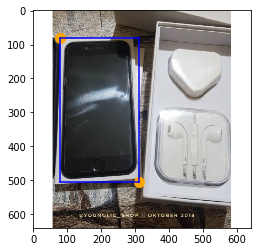

In [376]:
img_path = os.path.join('data/raw', df_mobile_image_path_train.iloc[79, :].values[0])
if img_path[-4:] != '.jpg': img_path += '.jpg'
img = skimage.io.imread(img_path)
x0, y0, x1, y1 = 80,80,310,505
draw_rectangle(img, x0, y0, x1, y1)
print(img_path)

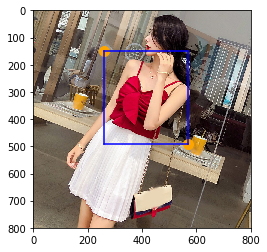

In [290]:
img_flipped = img[:, ::-1,:]
height, width, n_channels = img.shape
draw_rectangle(img_flipped, width - x1, y0, width - x0, y1)

In [401]:
img_pil = pil_loader(img_path)
# img_pil.transpose(Image.FLIP_LEFT_RIGHT)

False